3.6.9
max_Bx =  3.0751515453443034e-09
max_Ey =  0.49575902711914177
max_Bx =  1.6816536593675266e-09
max_Ey =  0.9763169460721408
max_Bx =  2.491286359964244e-09
max_Ey =  0.6534422783687481
max_Bx =  3.168628434654556e-09
max_Ey =  0.49930224847003524
max_Bx =  1.6730683910108537e-09
max_Ey =  0.4978365055548965
max_Bx =  1.6745373587966618e-09
max_Ey =  0.4985992451124133
max_Bx =  1.6635551604407617e-09
max_Ey =  0.4987264536408671
max_Bx =  1.683402982393276e-09
max_Ey =  0.5118497380737973
max_Bx =  1.9045538193530327e-09
max_Ey =  0.49836536872917686
max_Bx =  3.216175501921321e-09
max_Ey =  0.5005587534962416


/home/jackieyao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jackieyao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


max_Bx =  1.671008394744498e-09
max_Ey =  0.923575714932275
max_Bx =  1.7523985374182719e-09
max_Ey =  0.8294133143991695
max_Bx =  3.3560889781403443e-09
max_Ey =  0.4975675694436017
max_Bx =  1.6719246688051867e-09
max_Ey =  0.8807216783627742
max_Bx =  1.6930604752275647e-09
max_Ey =  0.8571131880974615
max_Bx =  3.391252924030916e-09
max_Ey =  0.4968143233402169
max_Bx =  1.896293354469151e-09
max_Ey =  0.8246933778601453
max_Bx =  1.67499322877501e-09
max_Ey =  0.9039618993131828
max_Bx =  3.3773702112663103e-09
max_Ey =  0.49775129002716145
max_Bx =  2.103088027848707e-09
max_Ey =  0.7755656032336716
max_Bx =  1.67505227867659e-09
max_Ey =  0.9362424988412532
max_Bx =  3.330952859659682e-09
max_Ey =  0.496226593337749
max_Bx =  2.3003626736656135e-09
max_Ey =  0.7203700250318913
max_Bx =  1.6730813696934532e-09
max_Ey =  0.97483485907737
max_Bx =  3.249084021460335e-09
max_Ey =  0.49723406094944794
max_Bx =  2.4846667648583774e-09
max_Ey =  0.659927201675326
max_Bx =  1.661454023

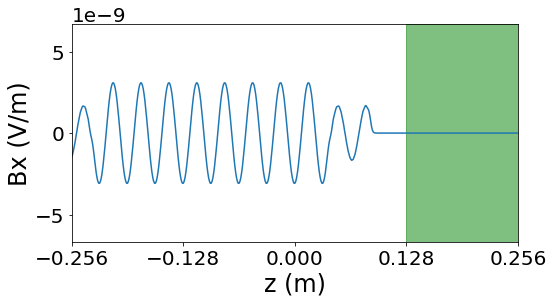

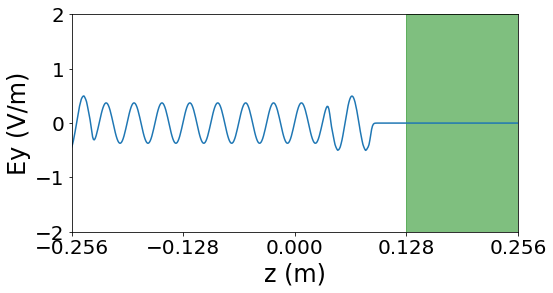

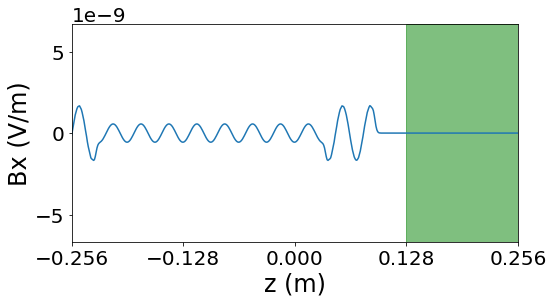

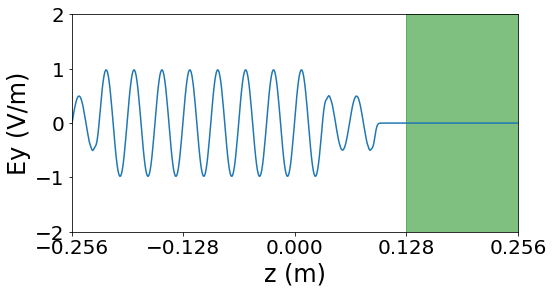

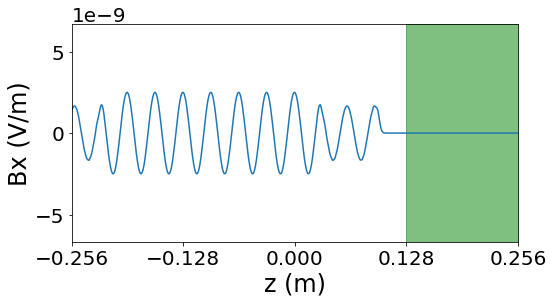

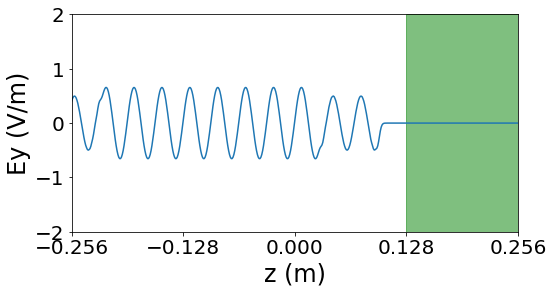

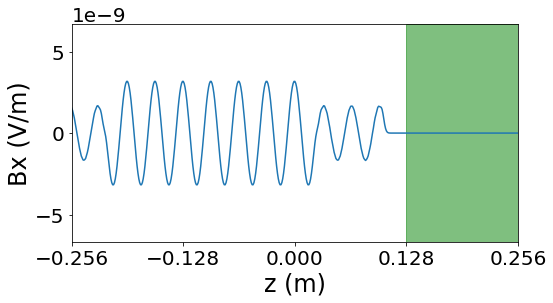

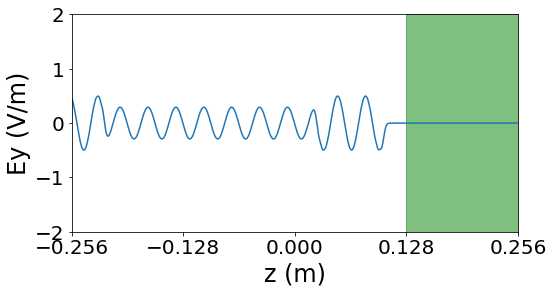

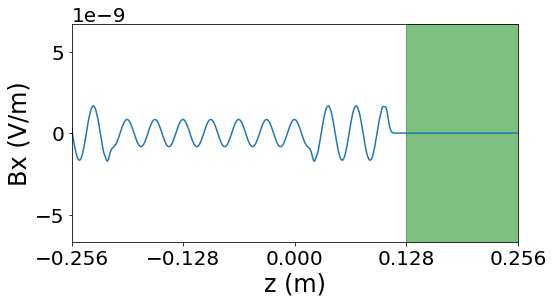

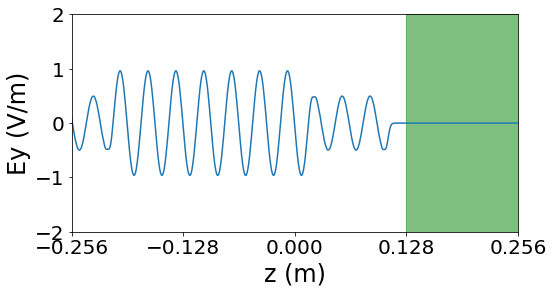

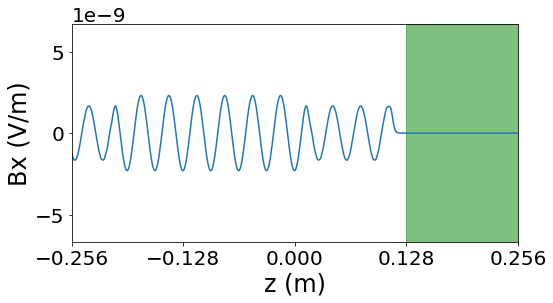

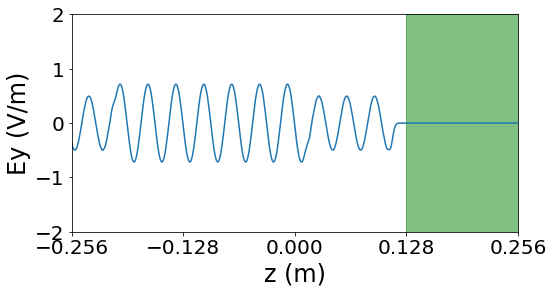

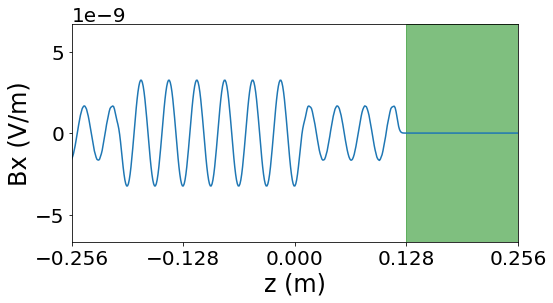

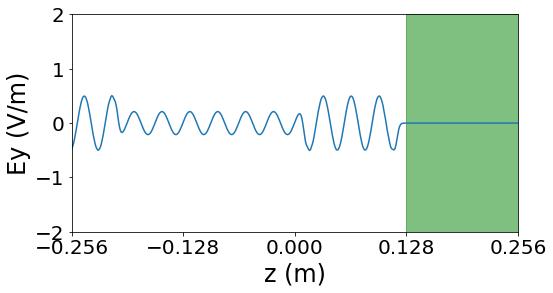

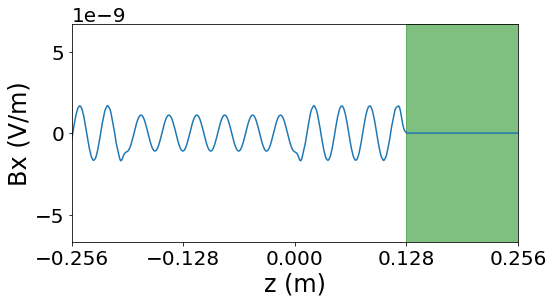

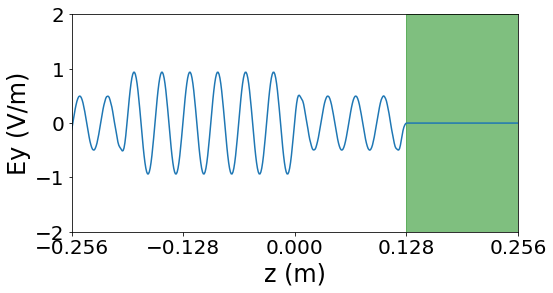

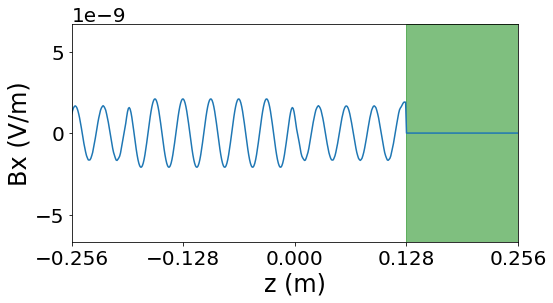

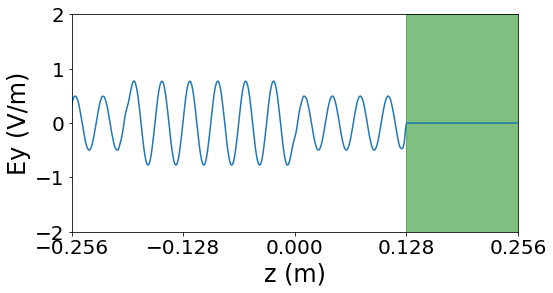

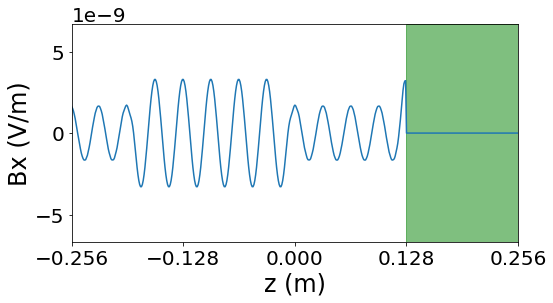

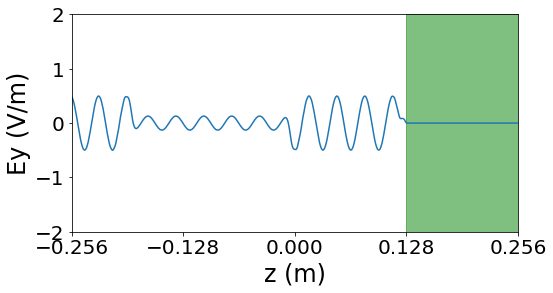

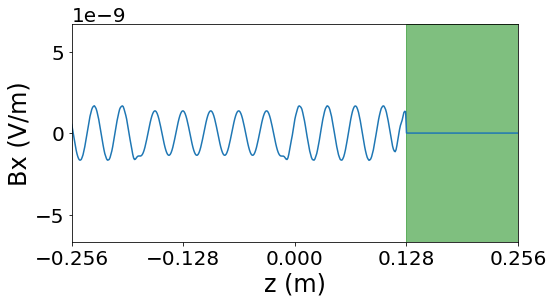

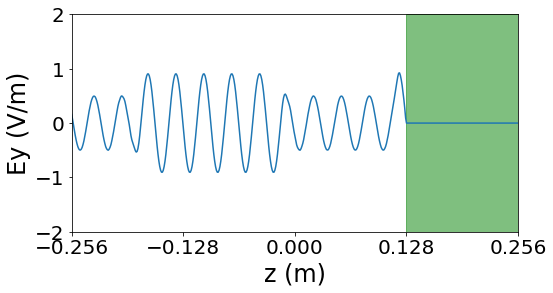

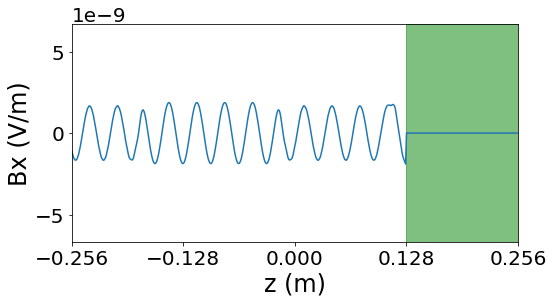

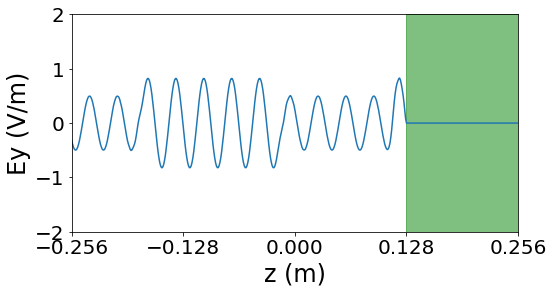

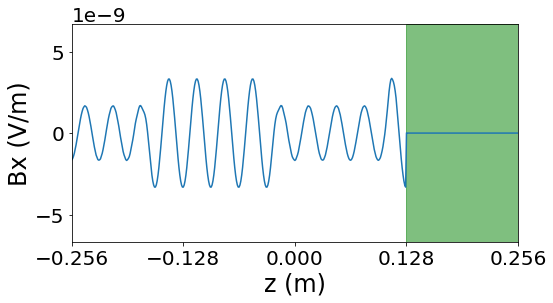

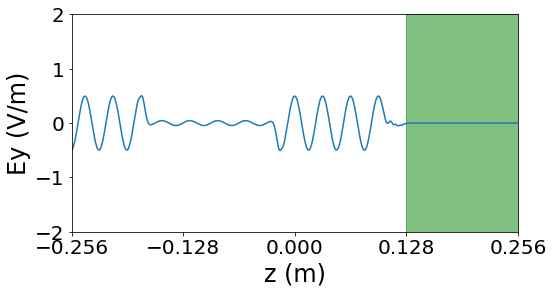

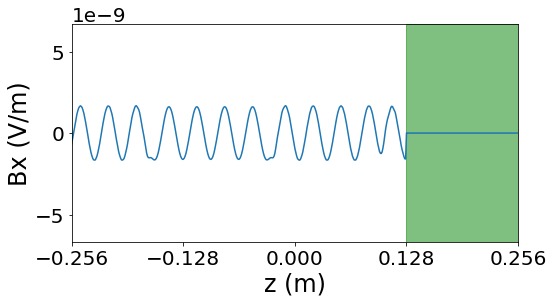

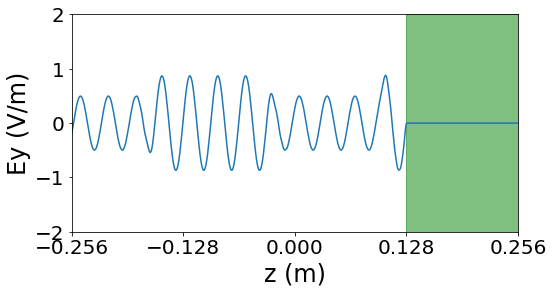

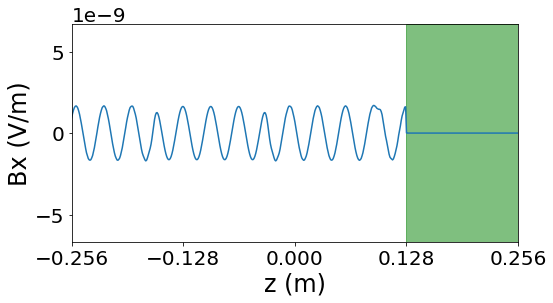

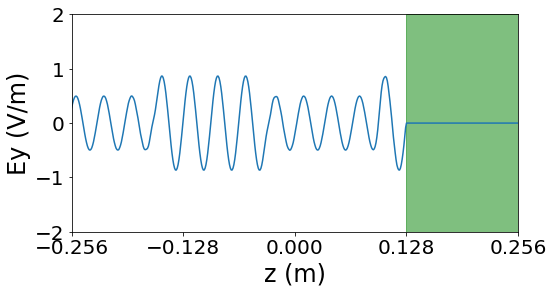

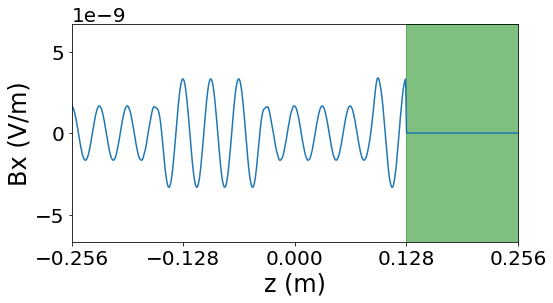

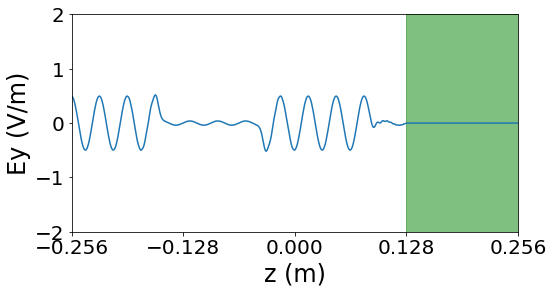

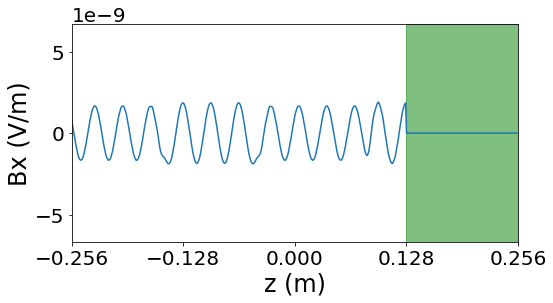

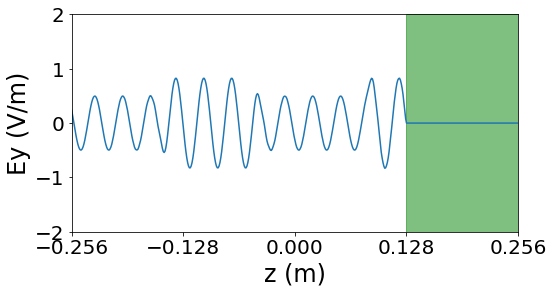

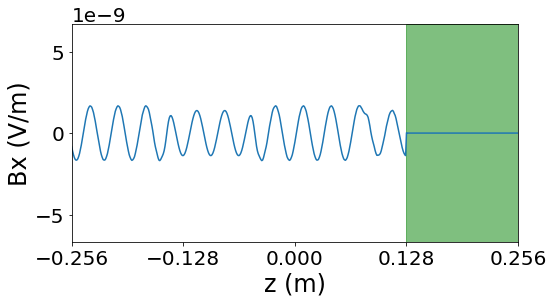

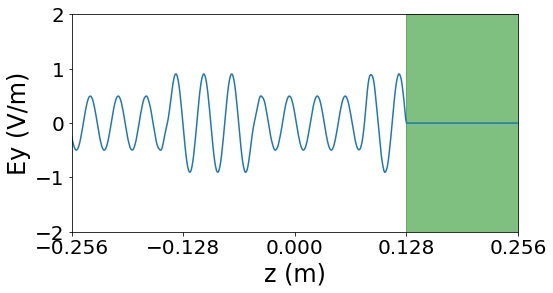

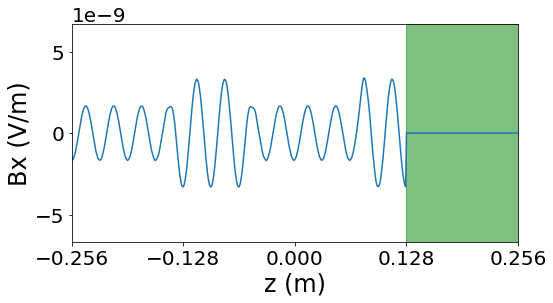

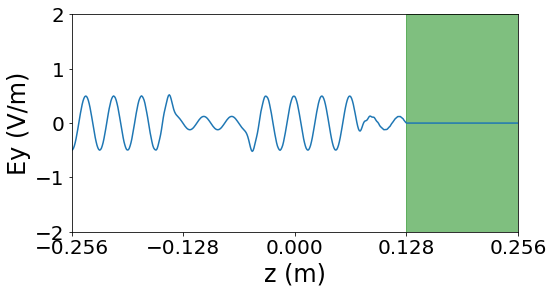

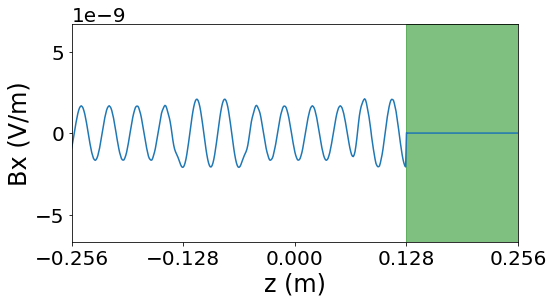

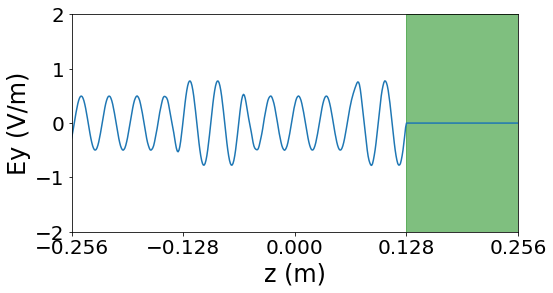

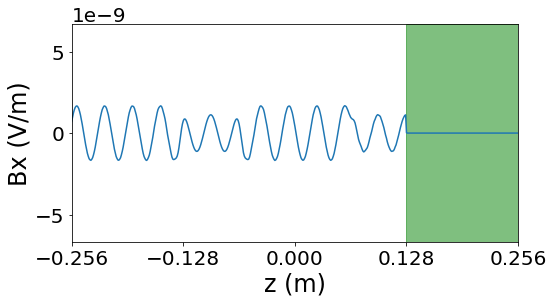

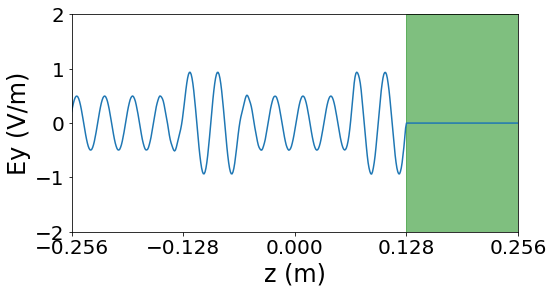

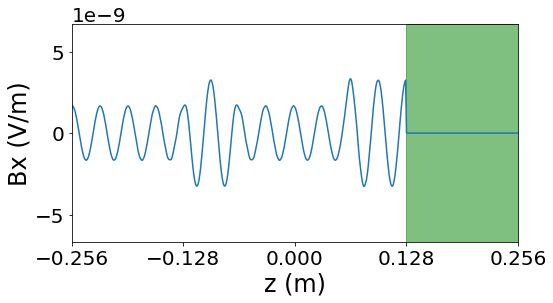

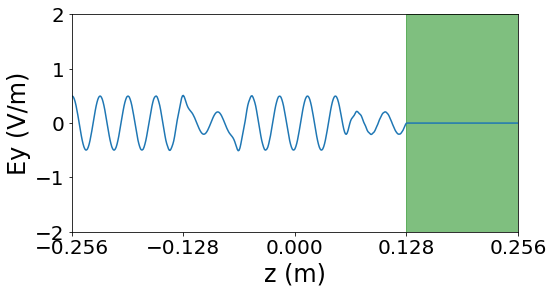

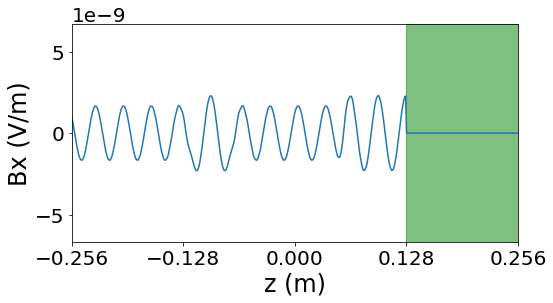

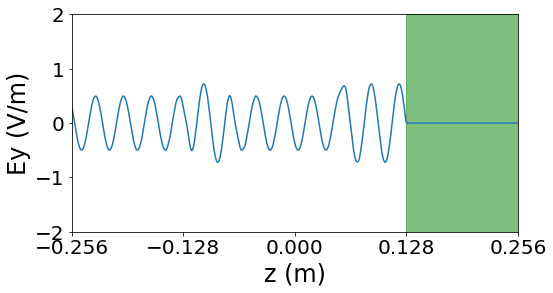

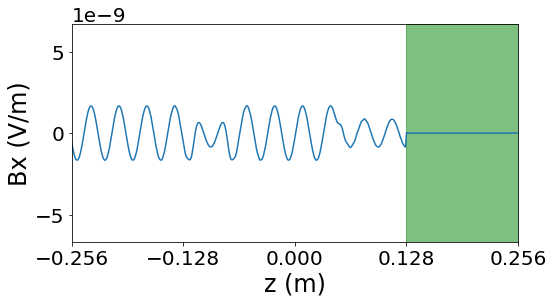

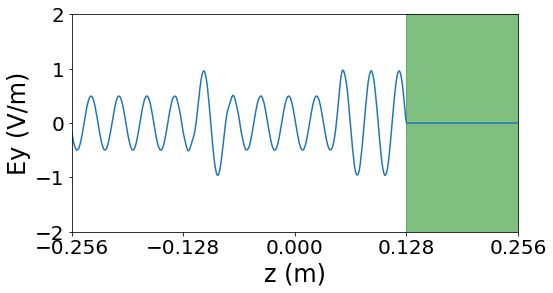

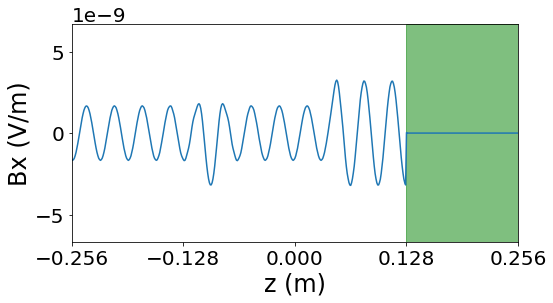

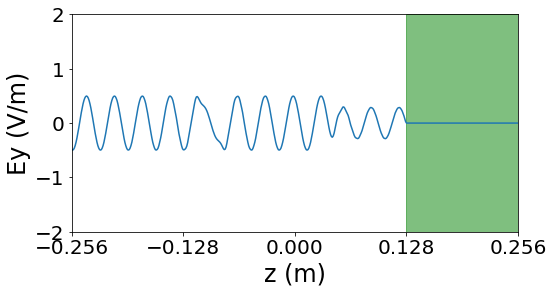

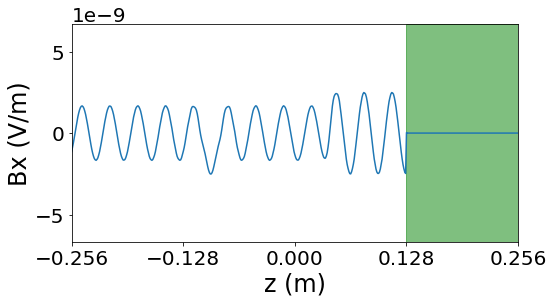

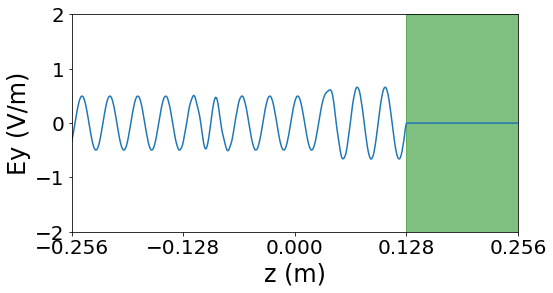

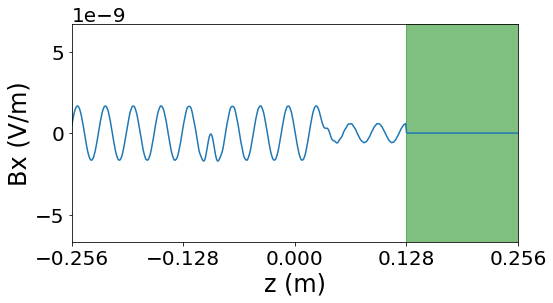

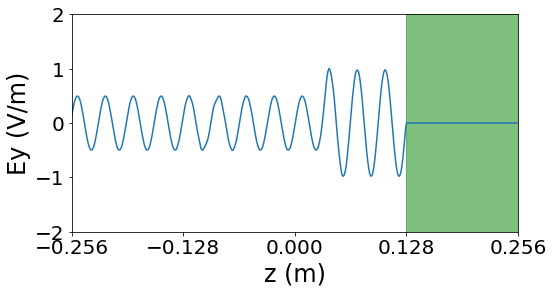

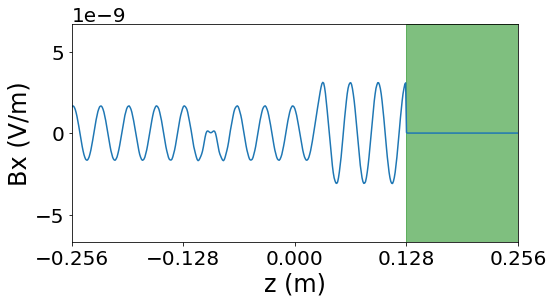

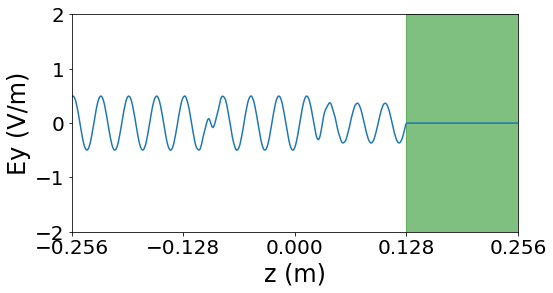

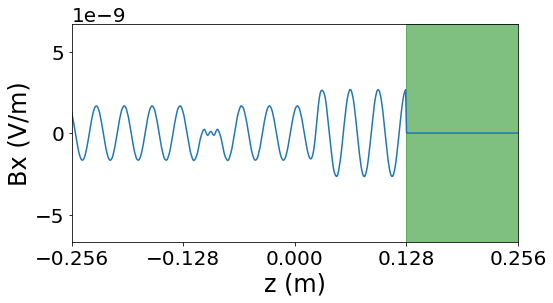

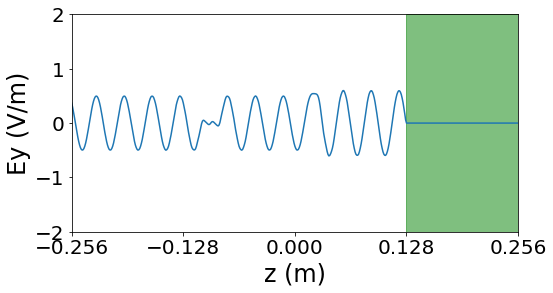

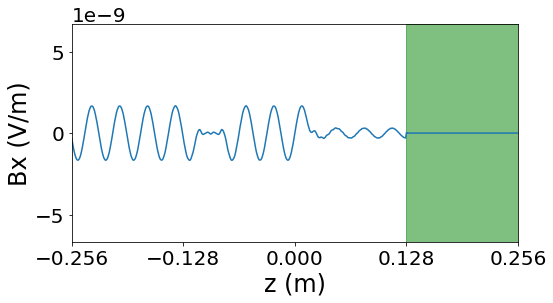

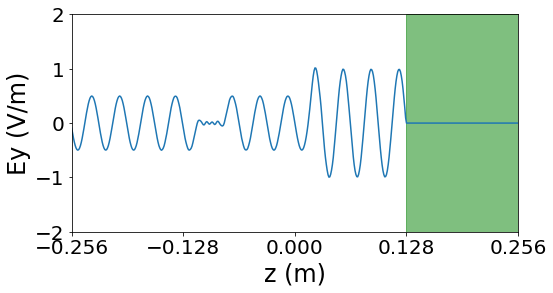

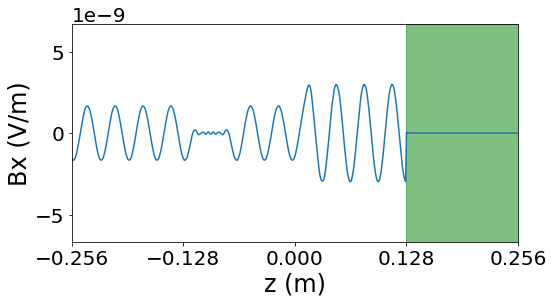

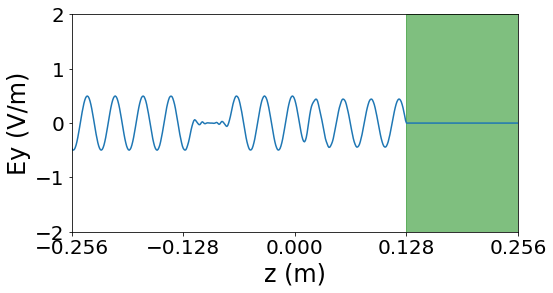

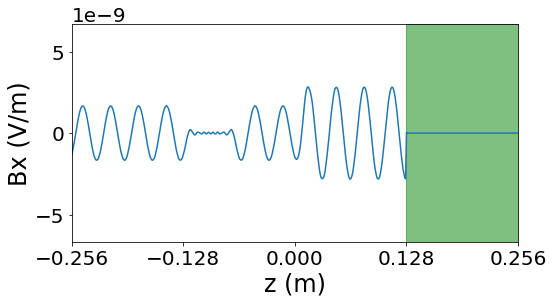

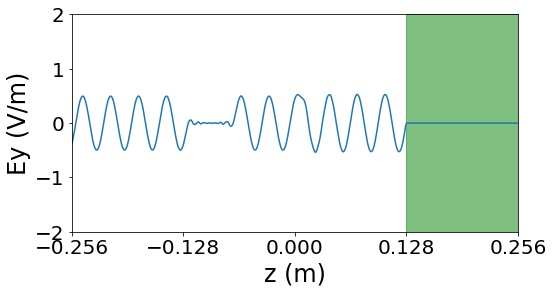

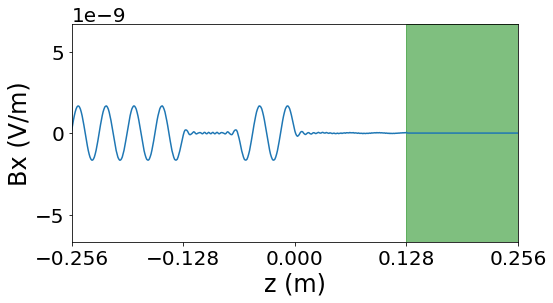

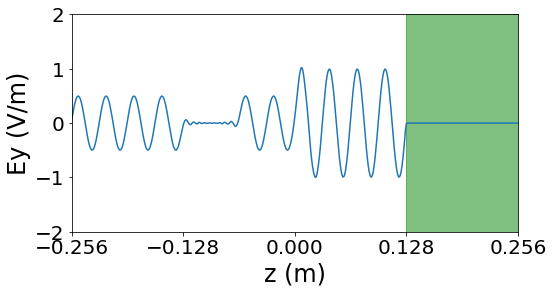

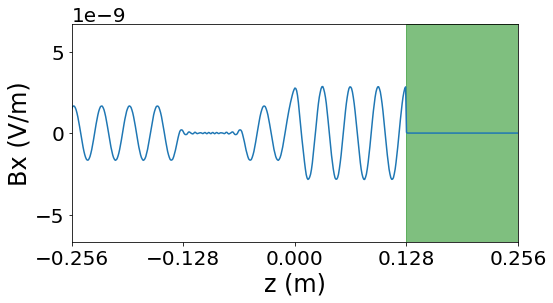

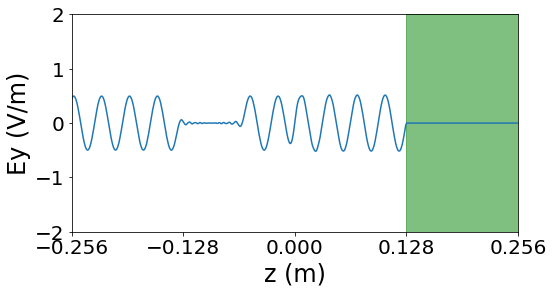

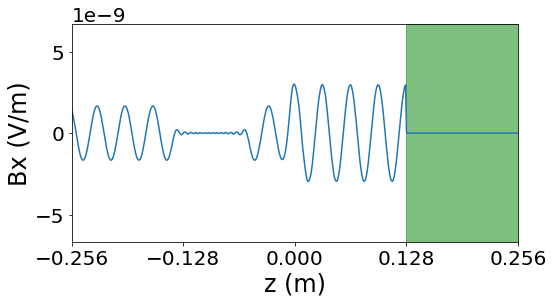

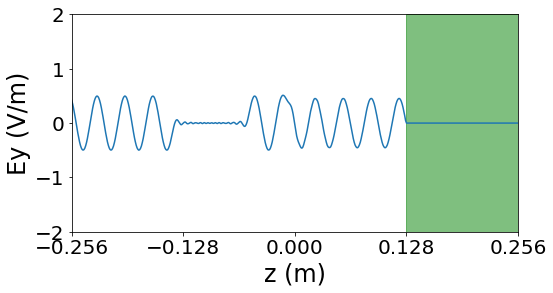

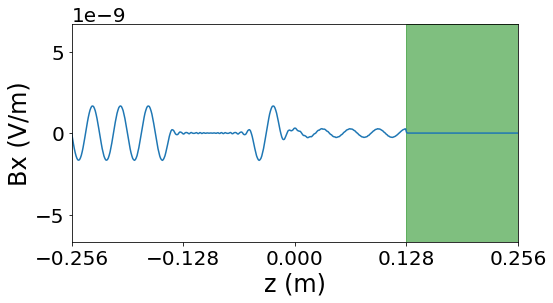

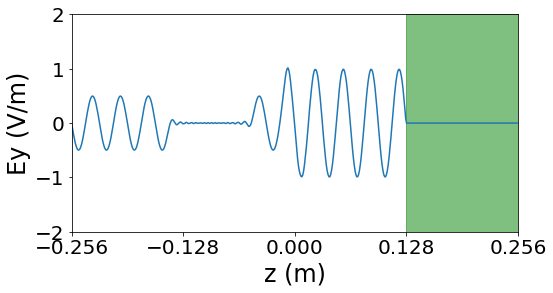

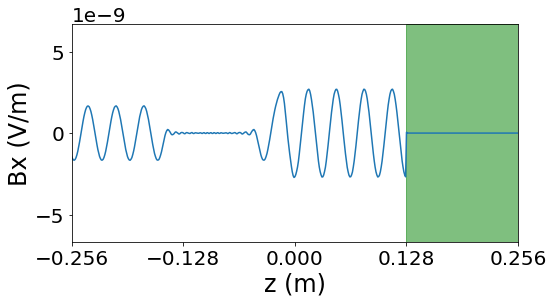

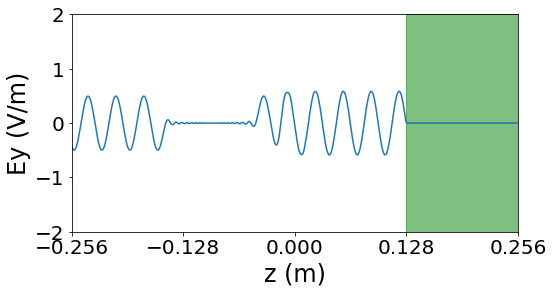

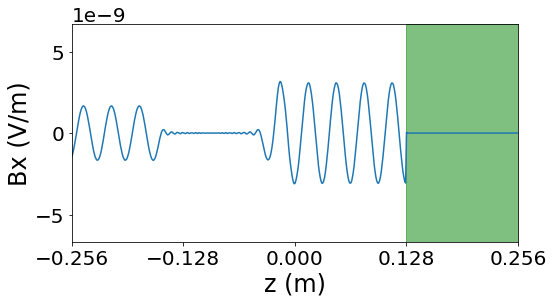

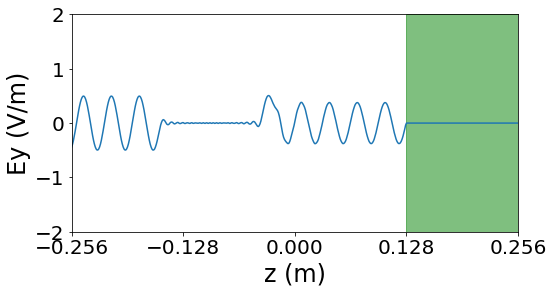

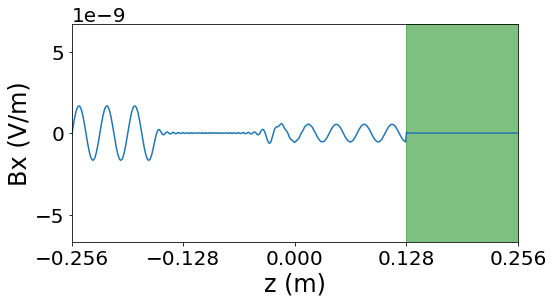

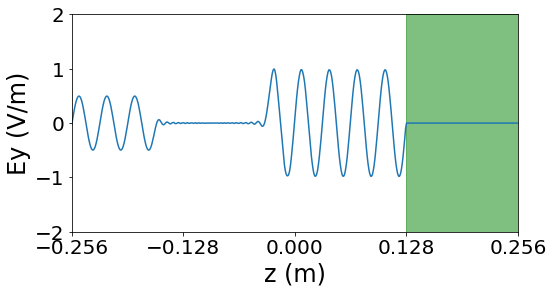

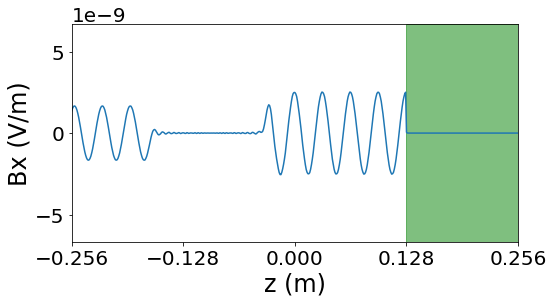

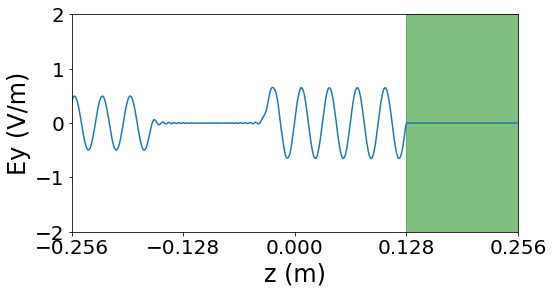

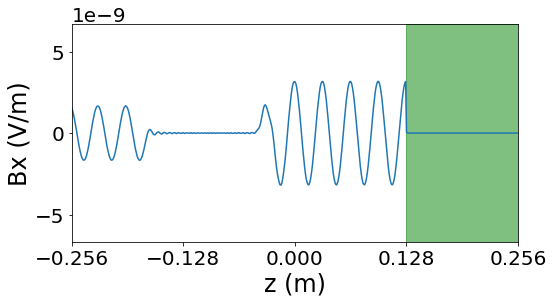

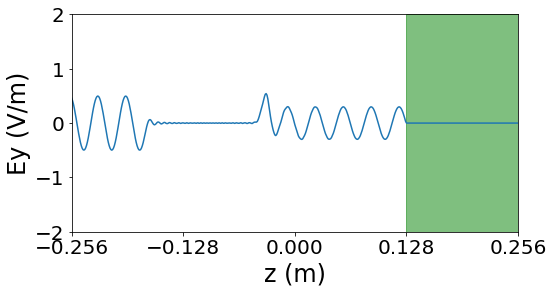

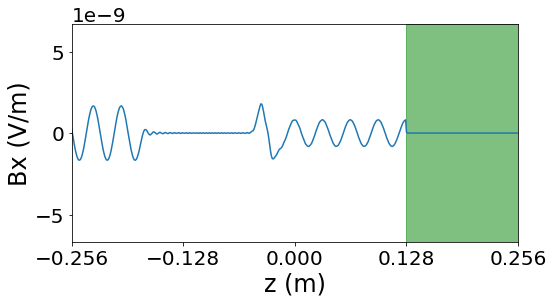

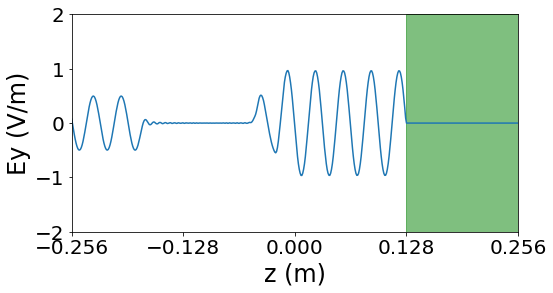

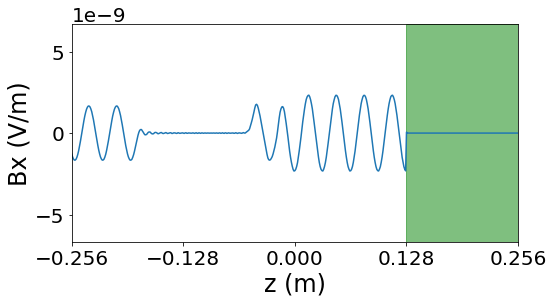

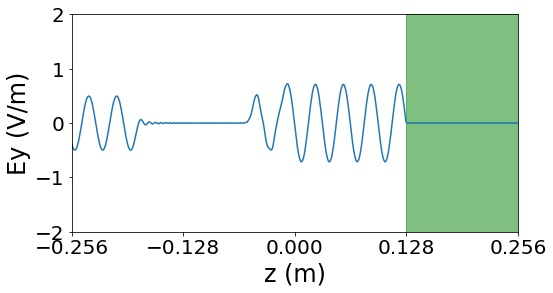

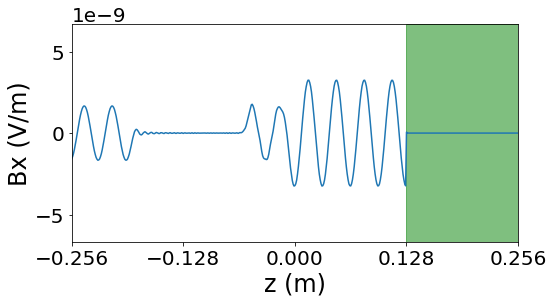

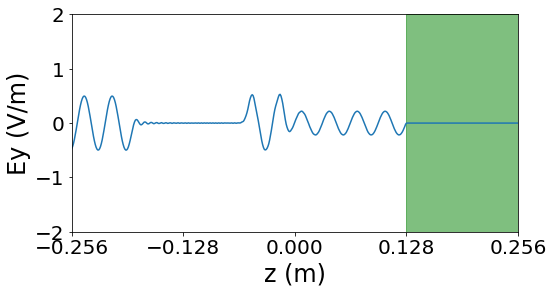

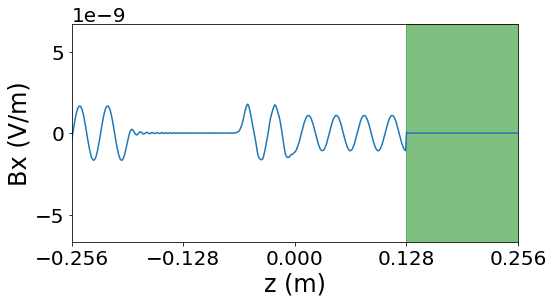

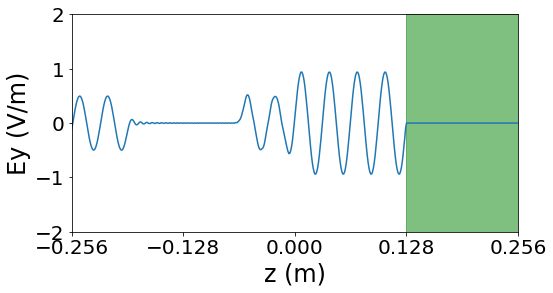

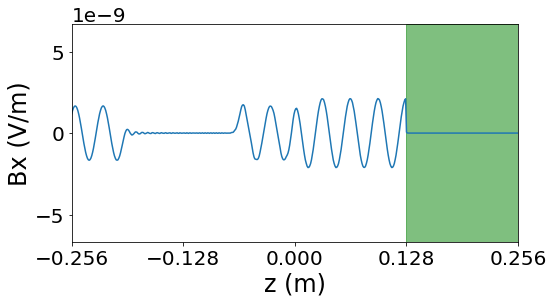

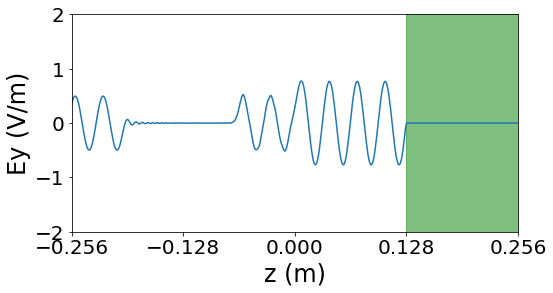

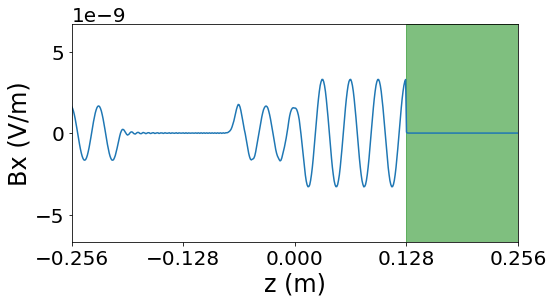

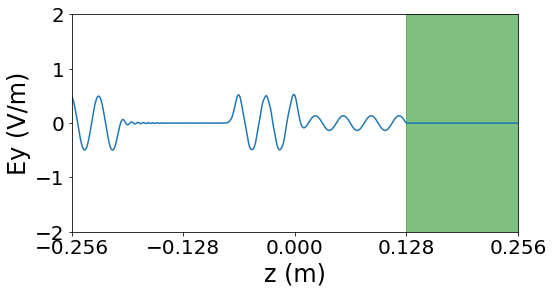

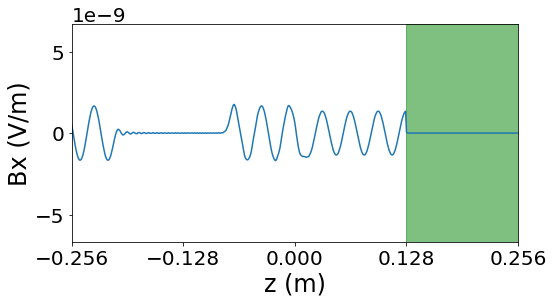

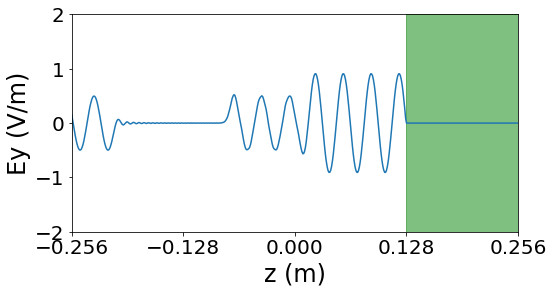

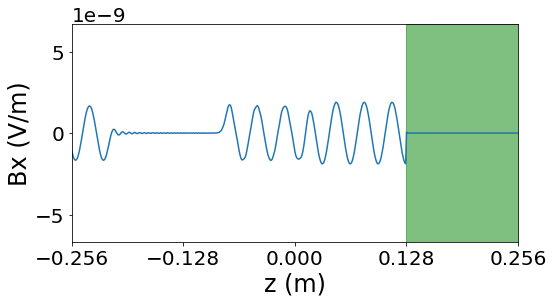

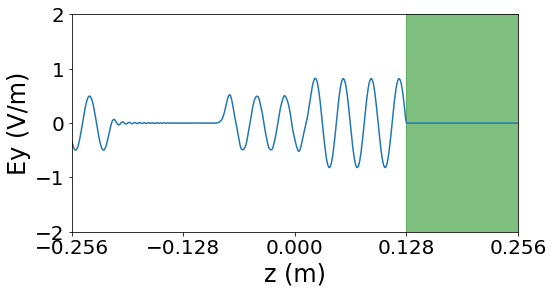

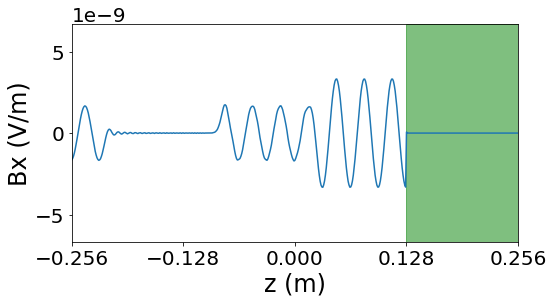

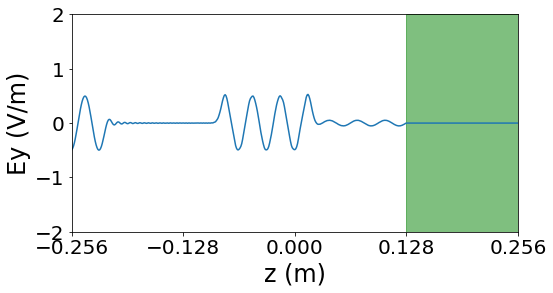

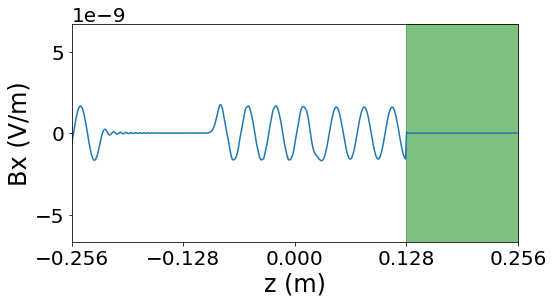

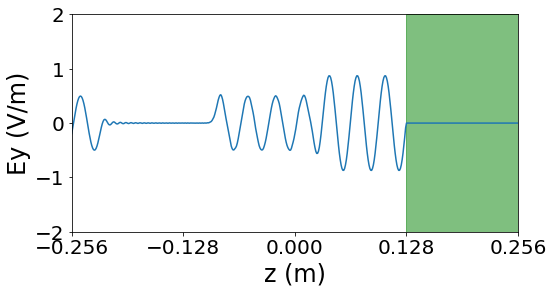

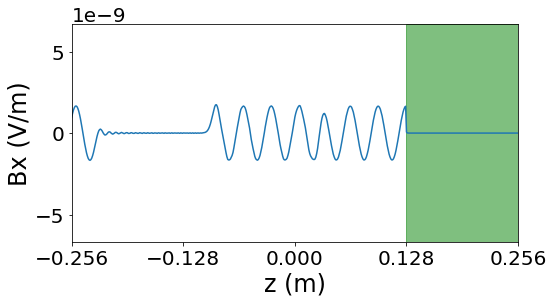

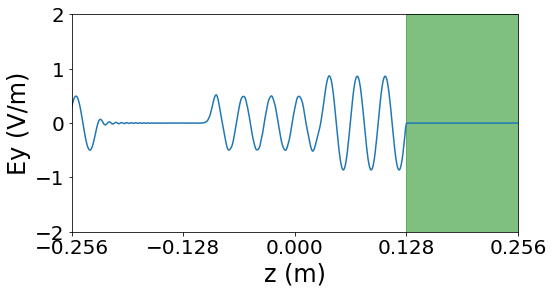

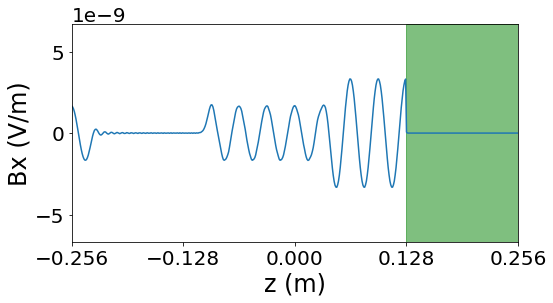

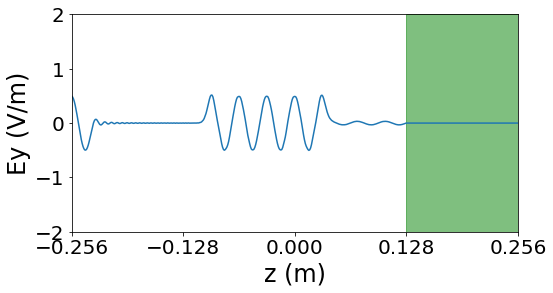

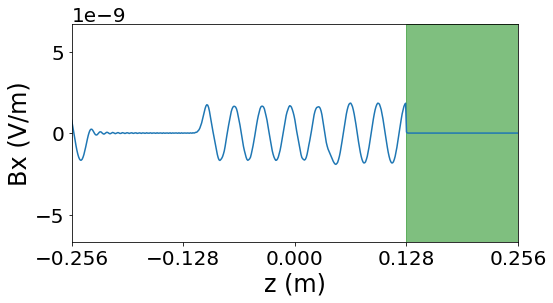

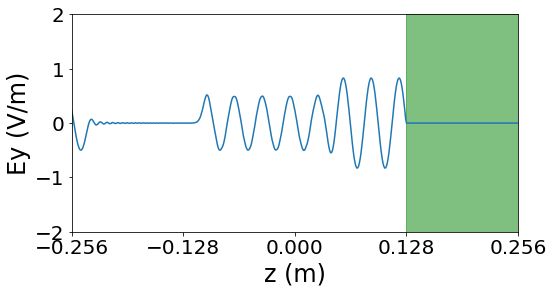

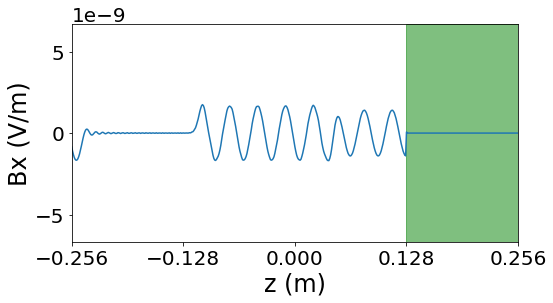

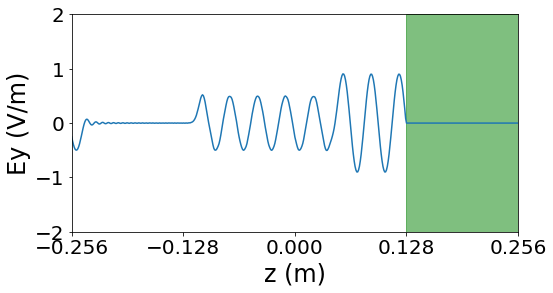

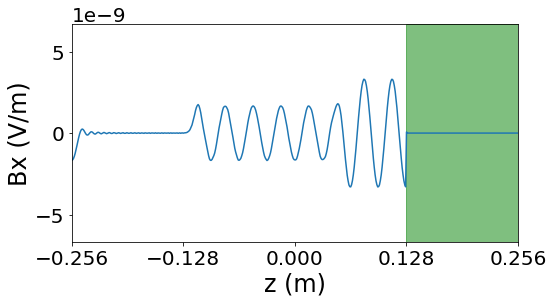

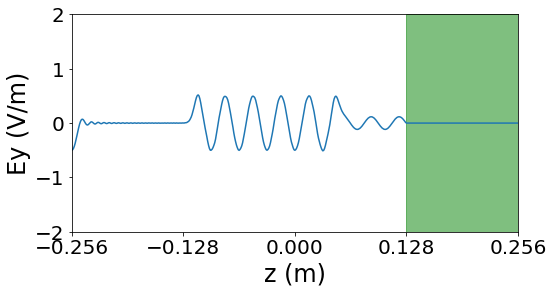

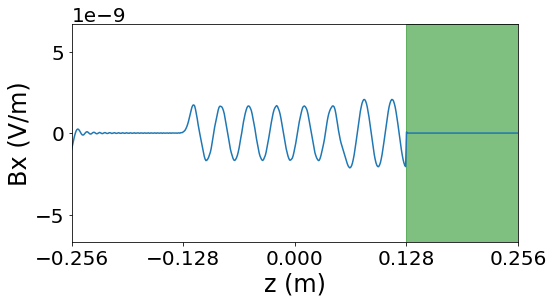

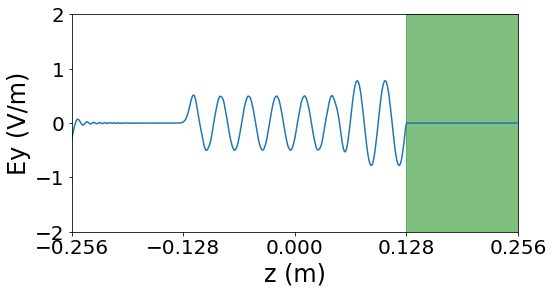

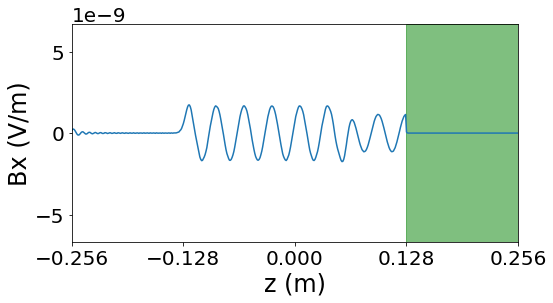

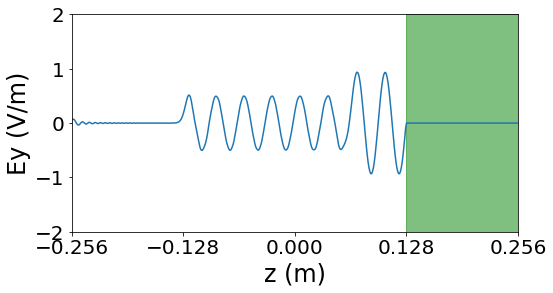

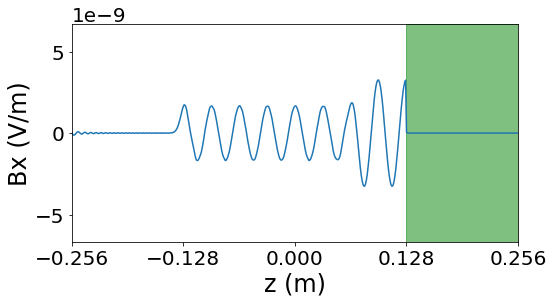

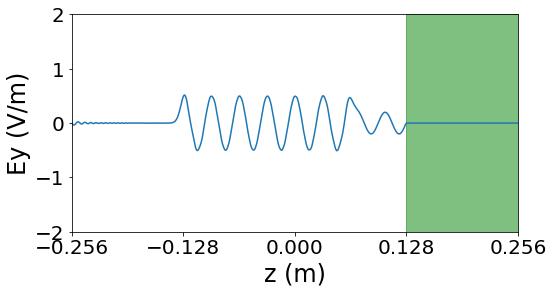

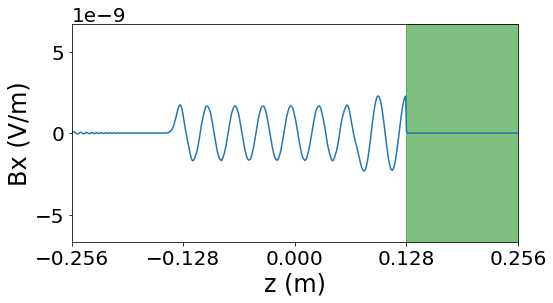

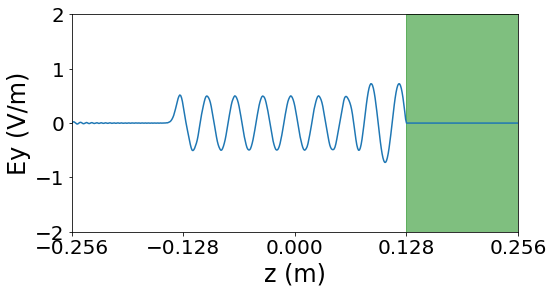

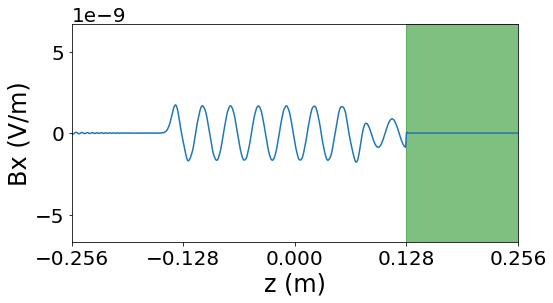

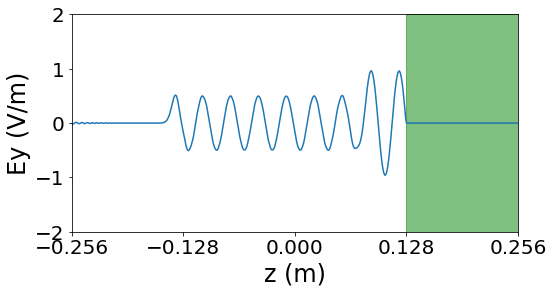

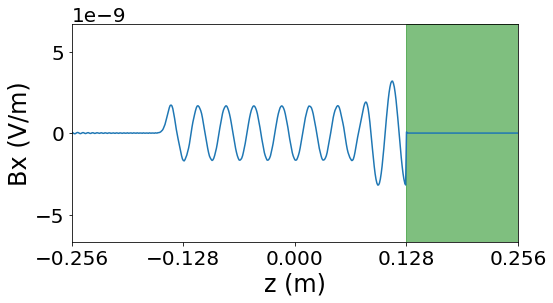

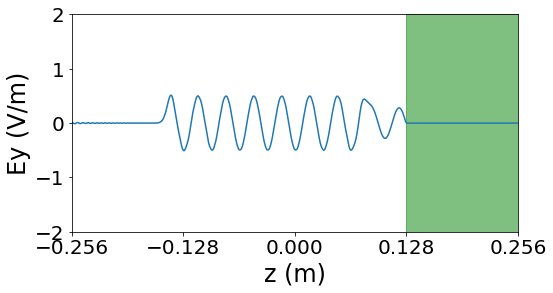

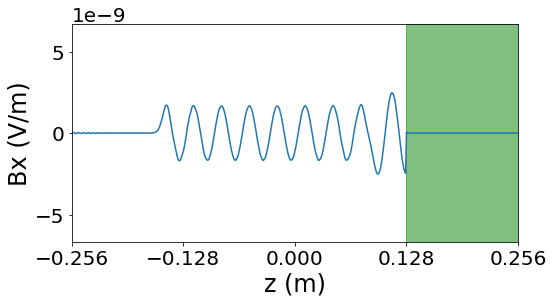

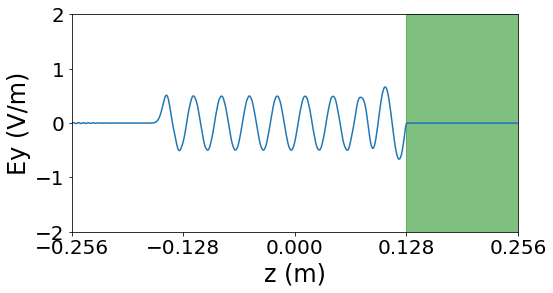

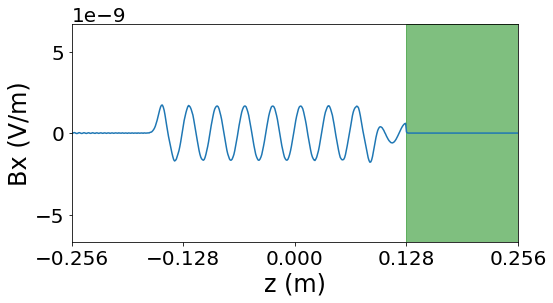

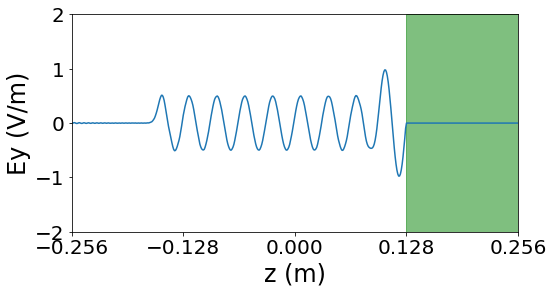

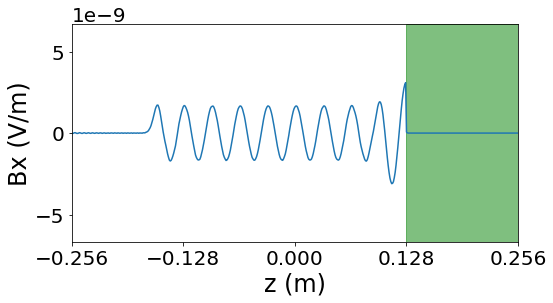

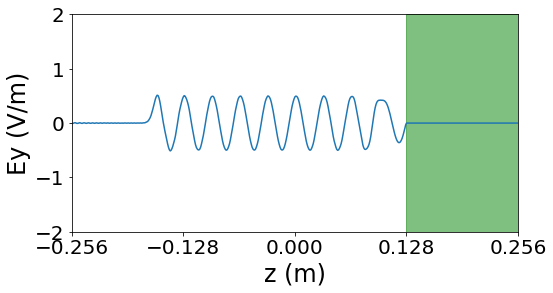

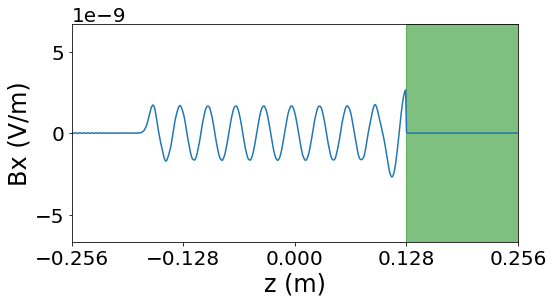

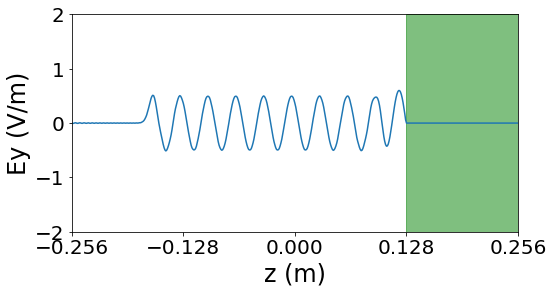

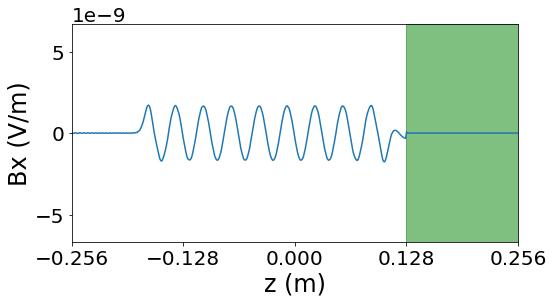

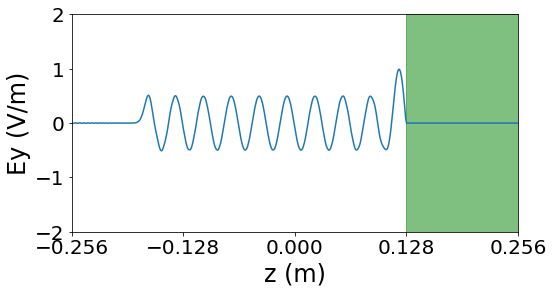

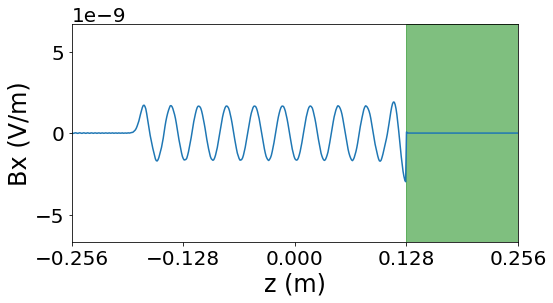

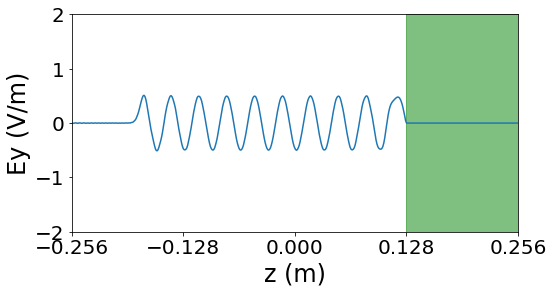

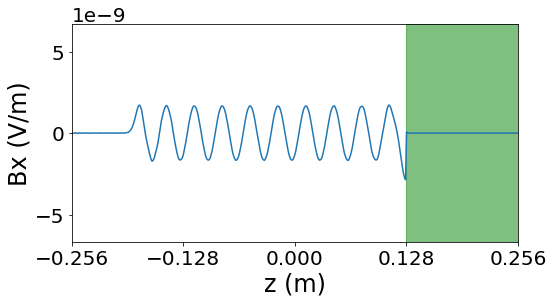

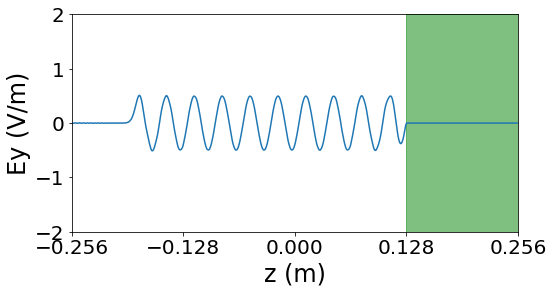

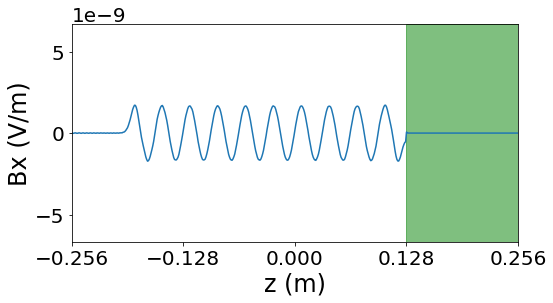

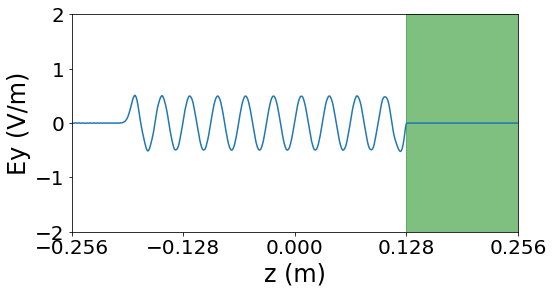

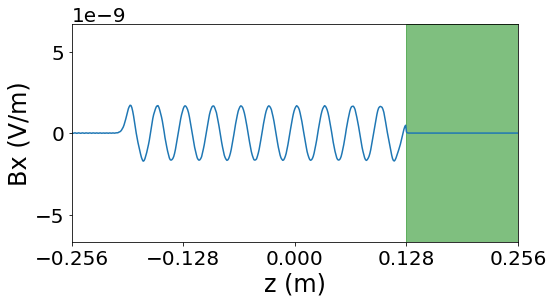

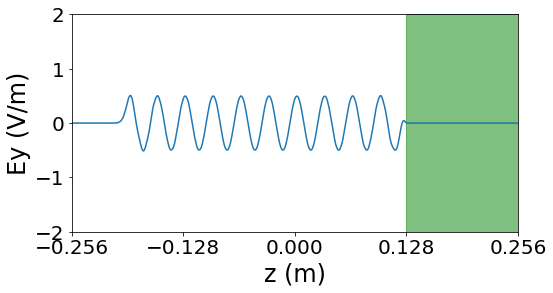

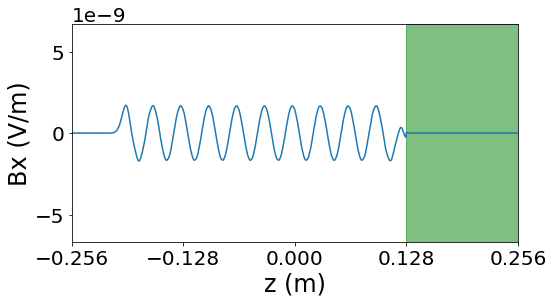

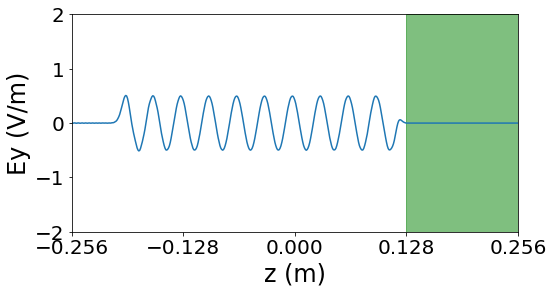

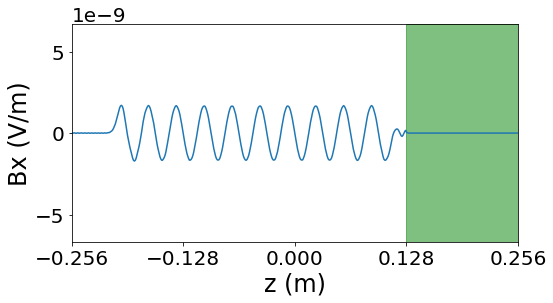

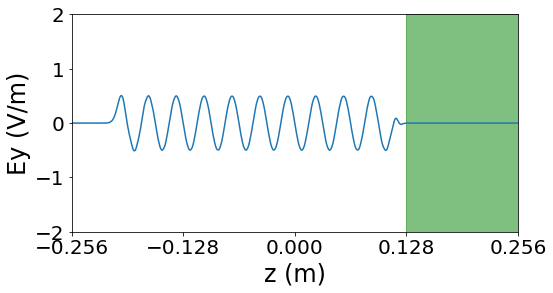

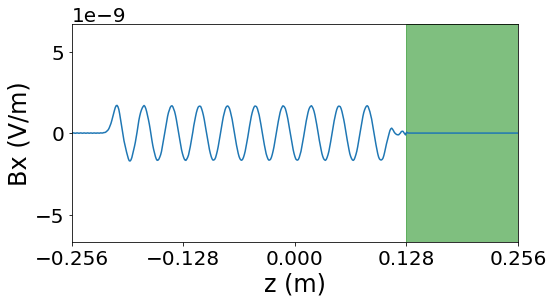

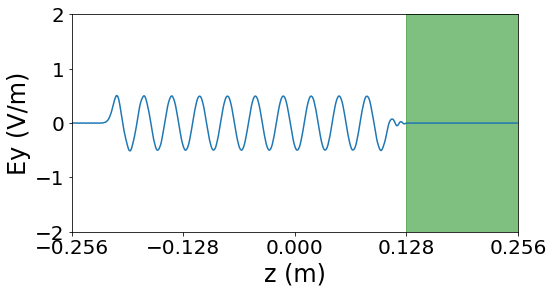

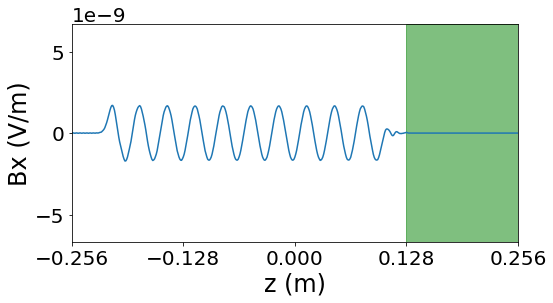

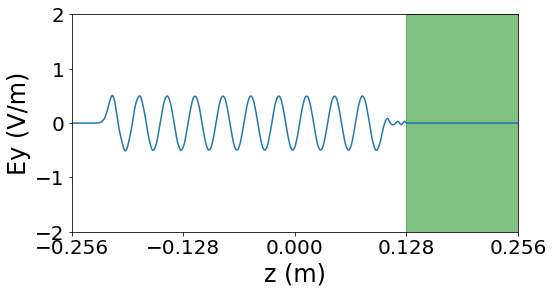

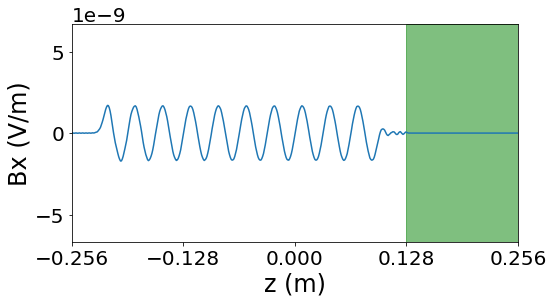

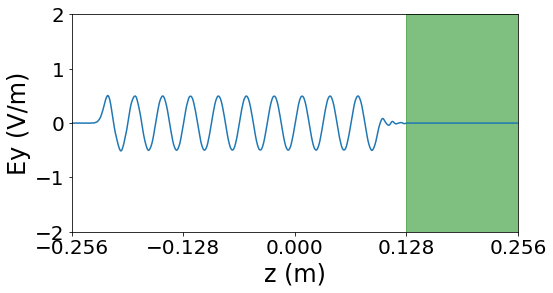

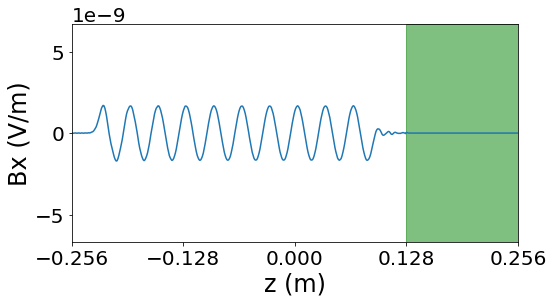

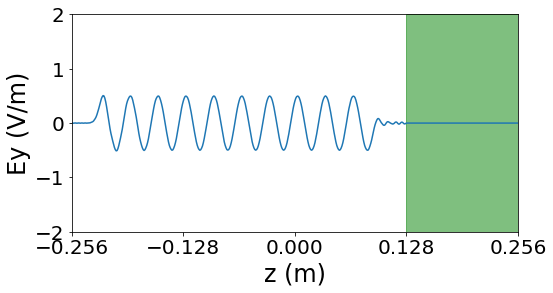

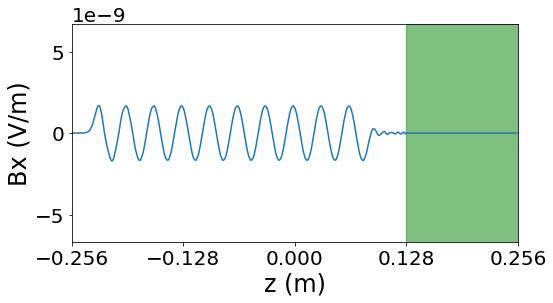

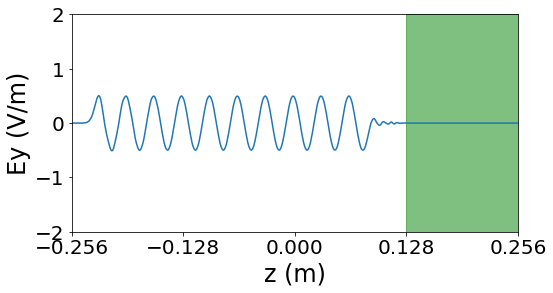

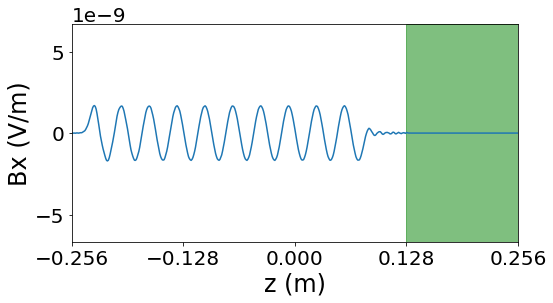

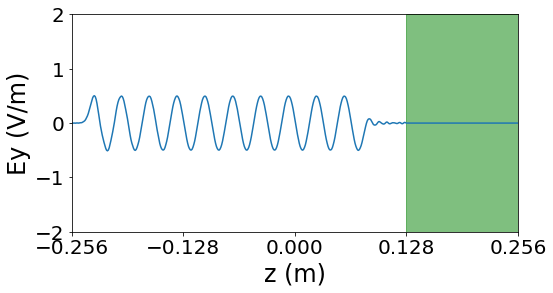

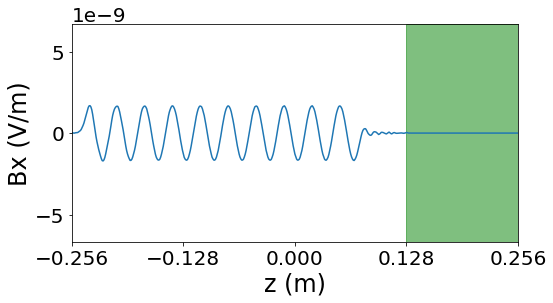

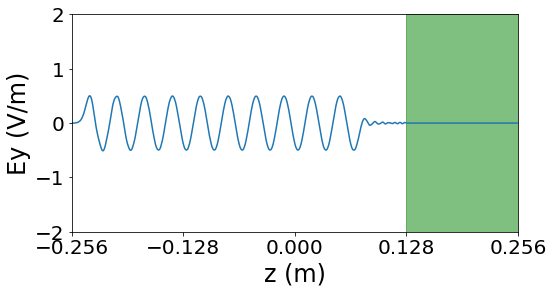

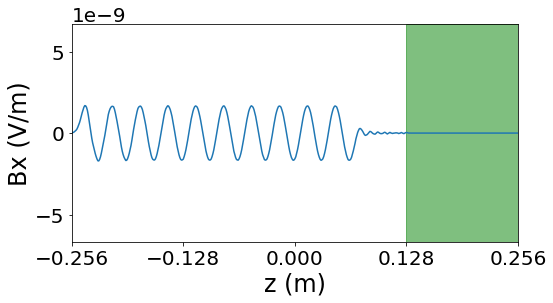

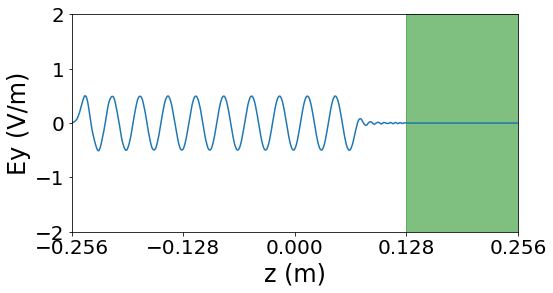

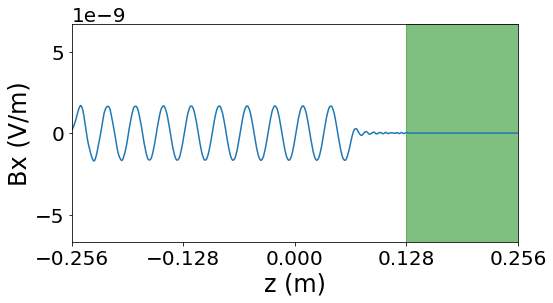

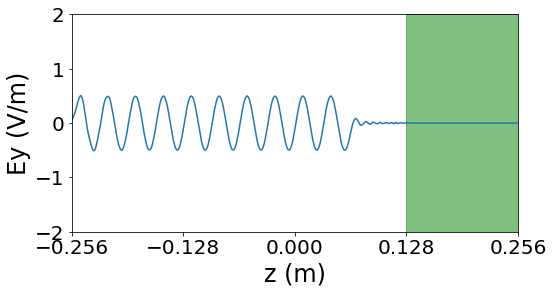

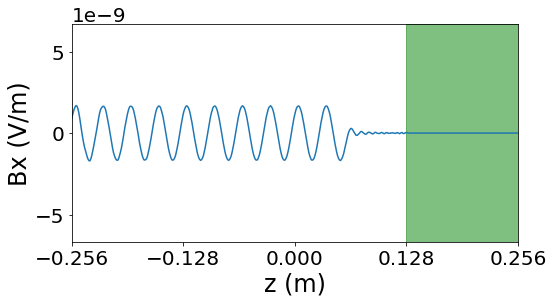

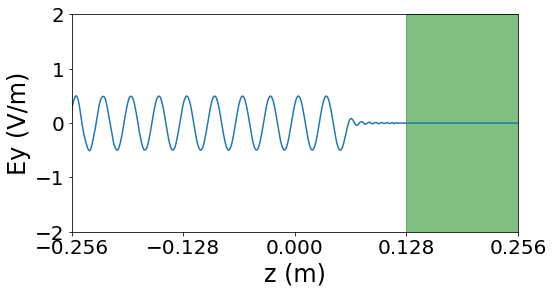

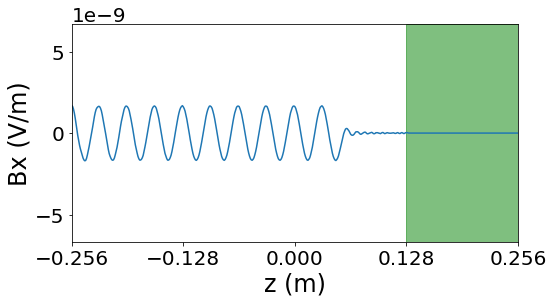

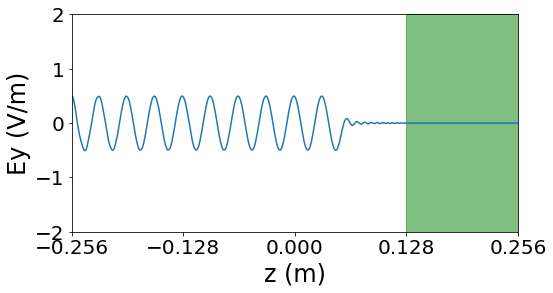

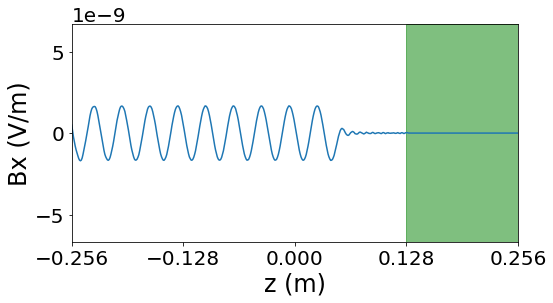

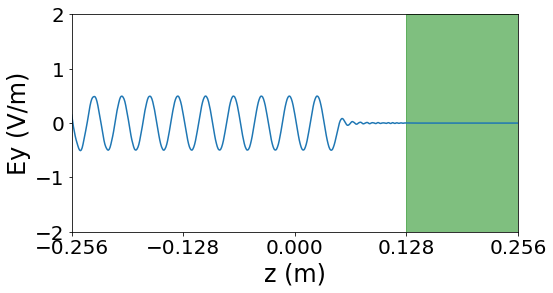

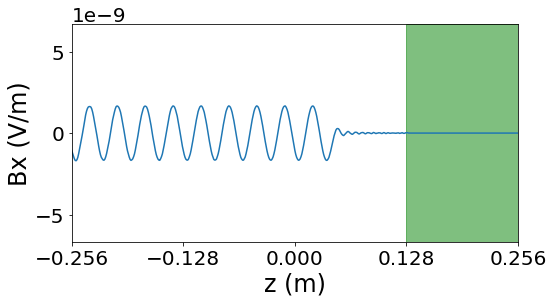

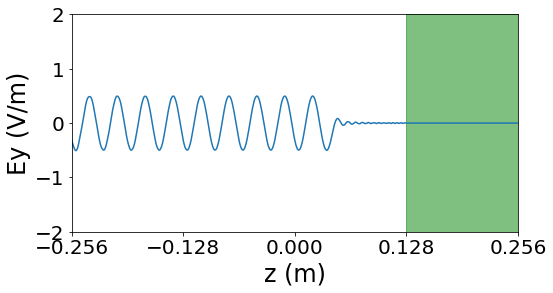

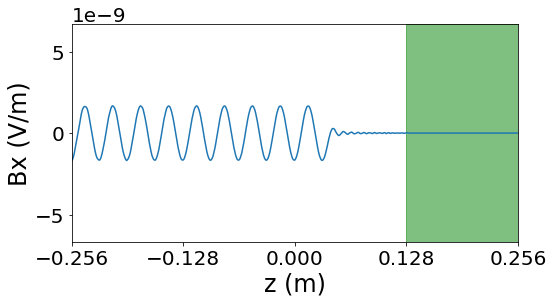

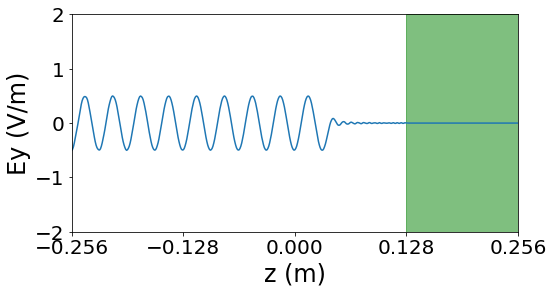

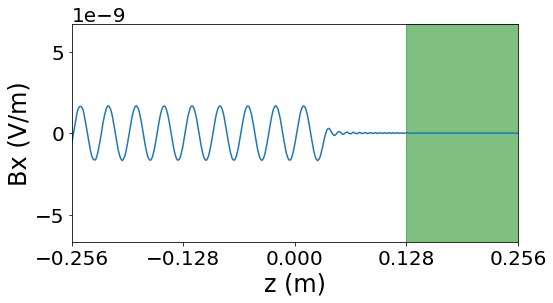

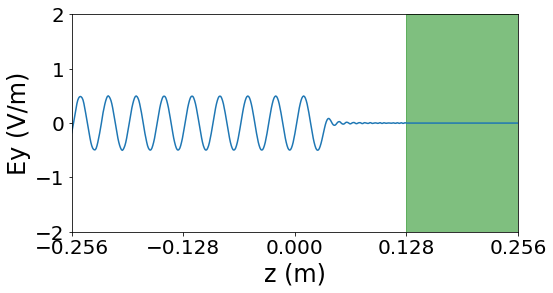

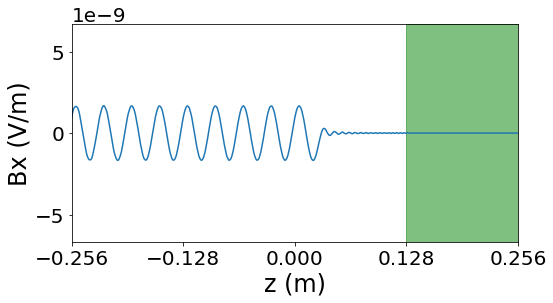

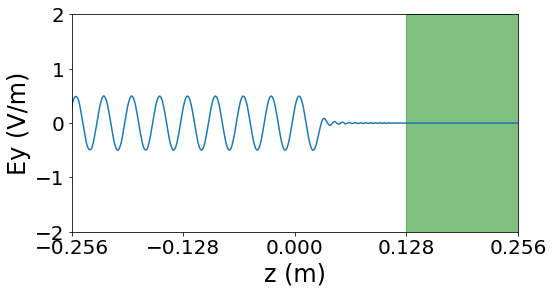

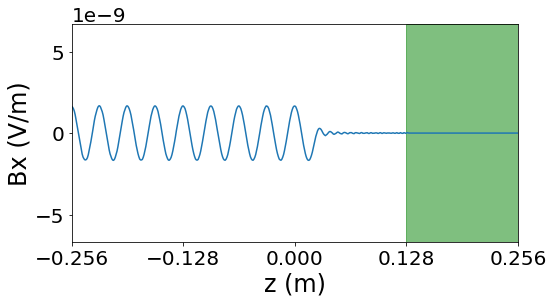

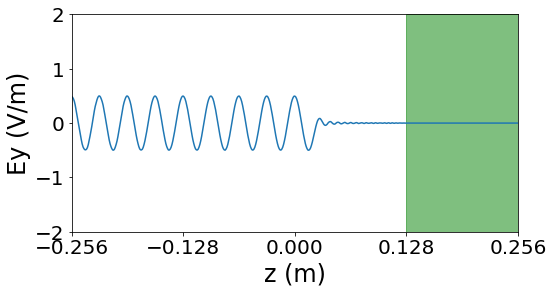

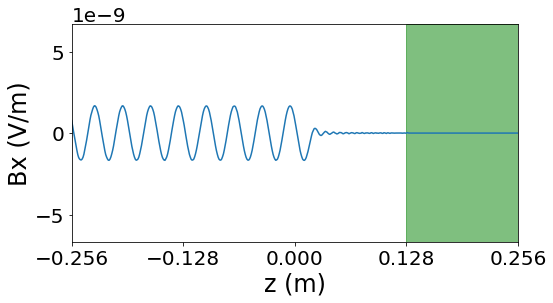

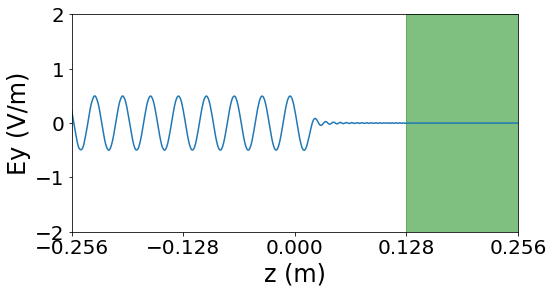

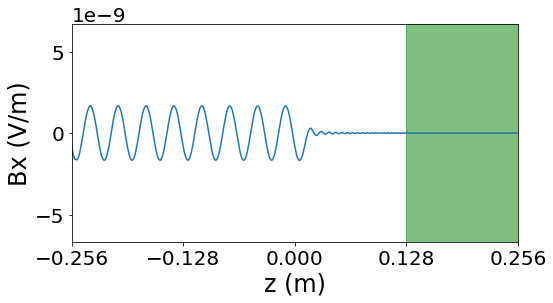

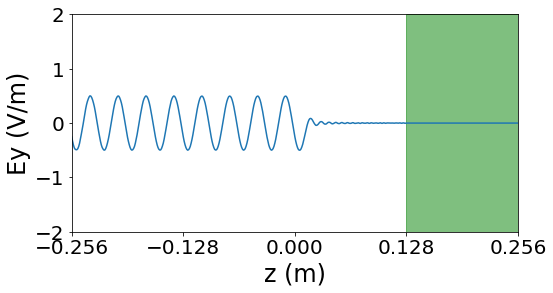

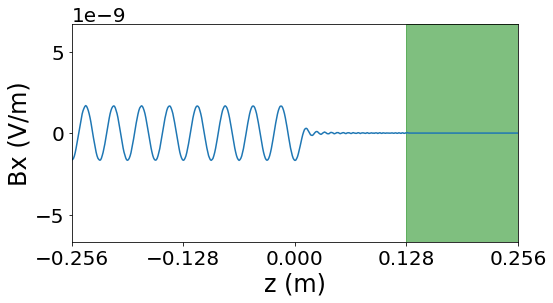

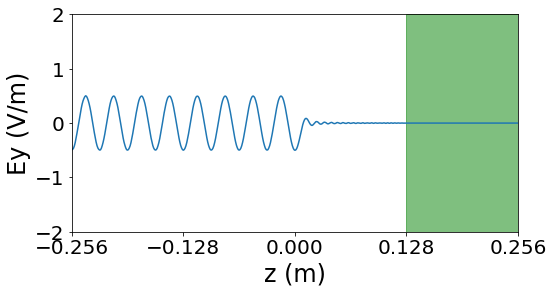

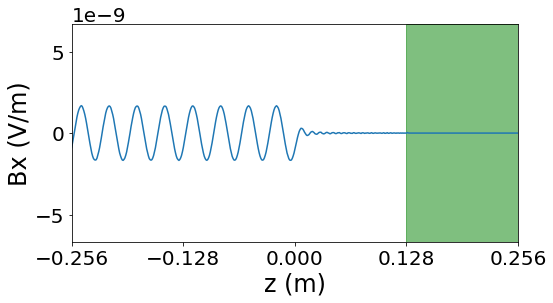

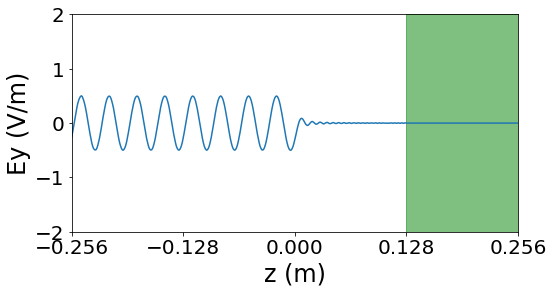

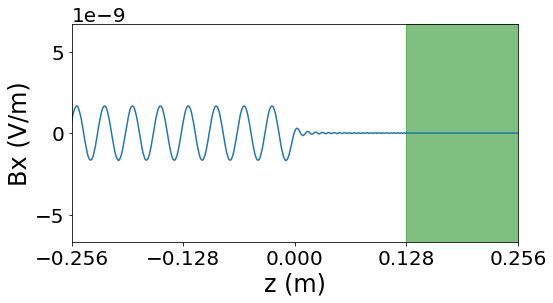

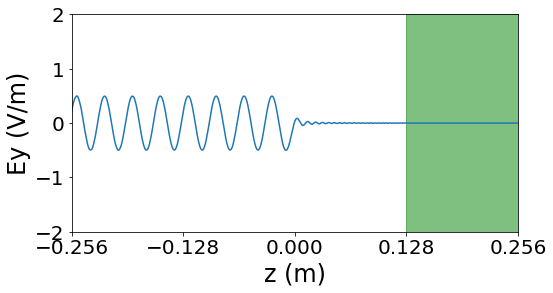

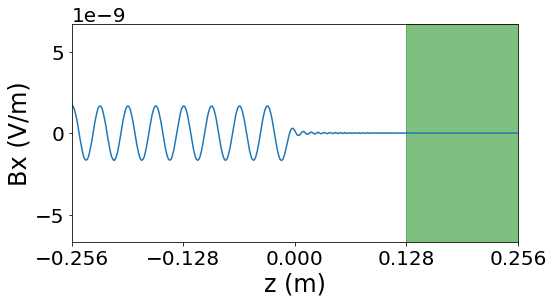

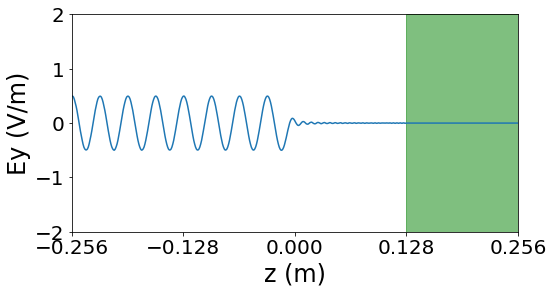

In [6]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# example below demonstrates how to save a single NumPy array to CSV format.
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
import cmath
import os
#%matplotlib notebook
iteration = 50
dt_iter = 10
while iteration < 1001 :
    ds = yt.load( './diags/diag1'+str(iteration).zfill(5) ) # Create a dataset object\n",
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    xCell = ds.domain_dimensions[0]
    yCell = ds.domain_dimensions[1]
    zCell = ds.domain_dimensions[2]
    z_array = ad0['z'].to_ndarray()
    Bx_array = ad0['Bx'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    # save to csv file
    savetxt('Bx_array.csv', Bx_array[int(xCell/2),int(yCell/2),:], delimiter=',')
    savetxt('Ey_array.csv', Ey_array[int(xCell/2),int(yCell/2),:], delimiter=',')
    savetxt('z_array.csv', z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)], delimiter=',')
    plt.figure(figsize=(8,4))
    plt.plot(z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)],Bx_array[int(xCell/2),int(yCell/2),:])
    plt.ylim(-2/3e8, 2/3e8)
    plt.xlim(-256e-3, 256.000001e-3)
    plt.xticks(np.arange(-256.e-3, 256.000001e-3, step=128.e-3))
    plt.xlabel('z (m)')
    plt.ylabel('Bx (V/m)')
    max_Bx = max(Bx_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
    print("max_Bx = ", max_Bx)
    plt.axvspan(128.e-3, 256.e-3, color='green', alpha=0.5)
    plt.savefig(str(iteration).zfill(5)+'_Bx.png',bbox_inches = "tight")
    plt.figure(figsize=(8,4))
    plt.plot(z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)],Ey_array[int(xCell/2),int(yCell/2),:])
    plt.ylim(-2, 2)
    plt.xlim(-256e-3, 256.000001e-3)
    plt.xticks(np.arange(-256.e-3, 256.000001e-3, step=128.e-3))
    plt.xlabel('z (m)')
    plt.ylabel('Ey (V/m)')
    max_Ey = max(Ey_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
    print("max_Ey = ", max_Ey)
    plt.axvspan(128.e-3, 256.e-3, color='green', alpha=0.5)
    plt.savefig(str(iteration).zfill(5)+'_Ey.png',bbox_inches = "tight")
    iteration = iteration + dt_iter
    

In [4]:
wavelength = 32.e-3
mu0 = 4*math.pi*1.e-7
epsilon0 = 8.86e-12
epr = 1
mur = 90000
c0 = 1/math.sqrt(mu0*epsilon0)
omega = 2*math.pi*c0/wavelength
sigma = 0 # conductivity of media
gamma = 1j*omega*math.sqrt(mur*epr*mu0*epsilon0)*cmath.sqrt(1-1j*sigma/omega/epr/epsilon0)
eta = 1j*omega*mur*mu0/gamma # intrinsic impedance of media
#eta = math.sqrt(mu0*mur/epr/epsilon0)
c = 1/cmath.sqrt(mu0*mur*(epr*epsilon0-1j*sigma/omega)) #speed of light in media
dt = 1.225592745e-12
#z_obs = 128e-3
#nt = z_obs/c0/dt
nt = 250
z_obs = nt*dt*np.real(c)
z_obs = 0.1
print("speed of light in vacuum", c0)
print("speed of light in media", c)
print("frequency = ", omega/2/math.pi)
print("propagation const = ", gamma)
print("intrinsic impedance = ", eta)
print("tranmission coef = ", 2*eta/(eta+120*math.pi))
print("reflection coef =", (eta-120*math.pi)/(eta+120*math.pi))
print("observation time point", nt)
print("observation point z =", z_obs)
print("attenuation term = ", math.exp(-np.real(gamma)*z_obs))

speed of light in vacuum 299694109.563299
speed of light in media (998980.3652109966+0j)
frequency =  9365440923.853092
propagation const =  58904.86225480861j
intrinsic impedance =  (112982.01755138338+0j)
tranmission coef =  (1.99334872238467+0j)
reflection coef = (0.99334872238467+0j)
observation time point 250
observation point z = 0.1
attenuation term =  1.0
